# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:33:00.752877: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:33:03.690898
2025-04-14 19:33:03.690898


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 259
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:32:58"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

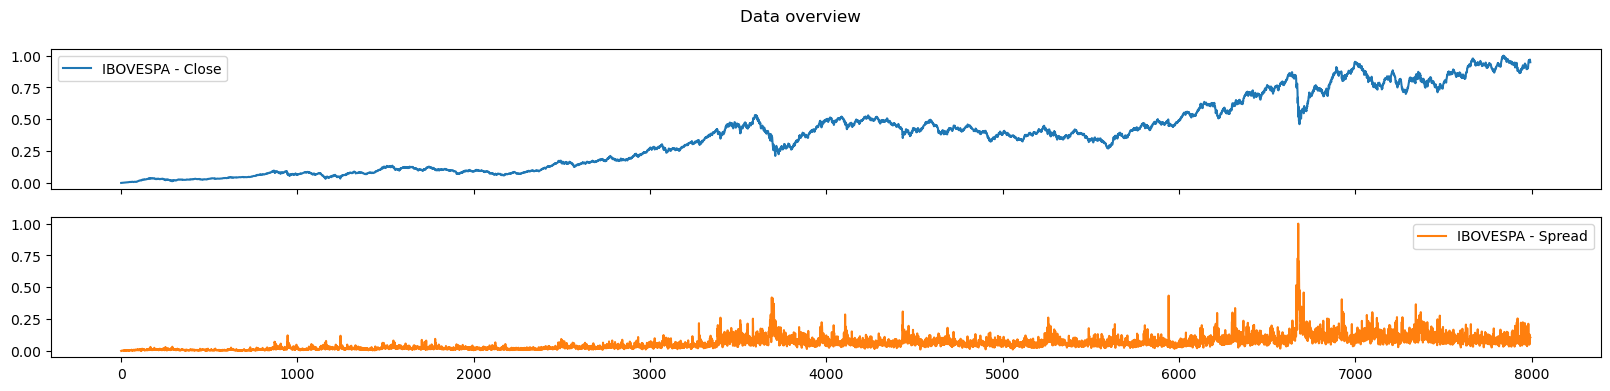

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

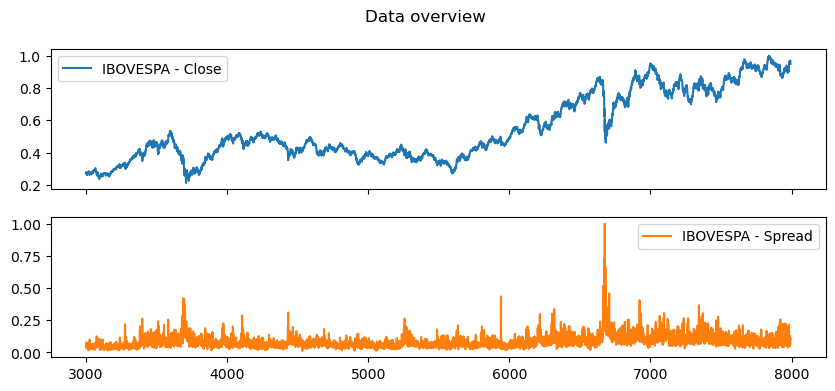

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

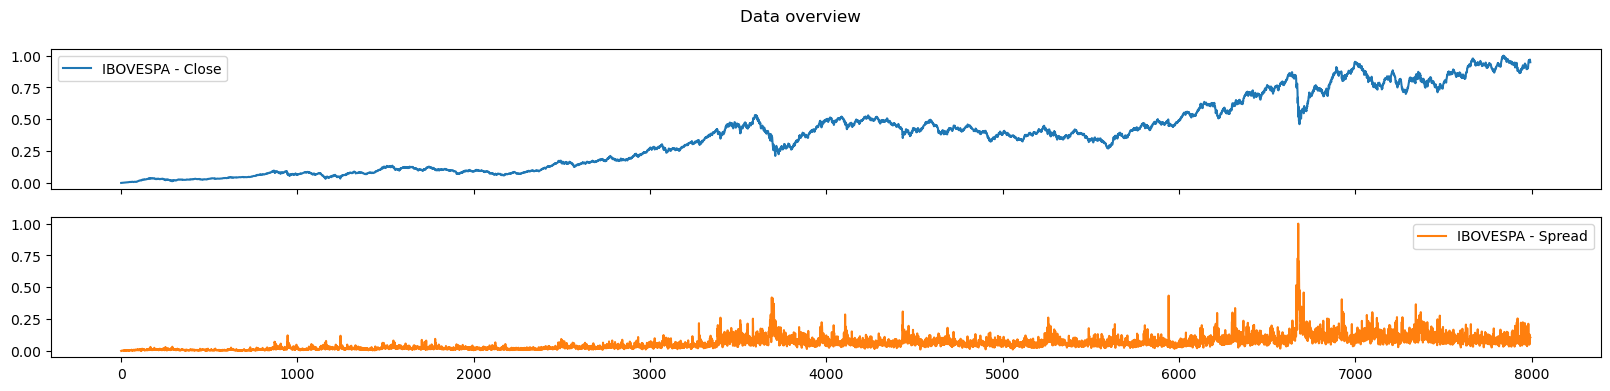

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

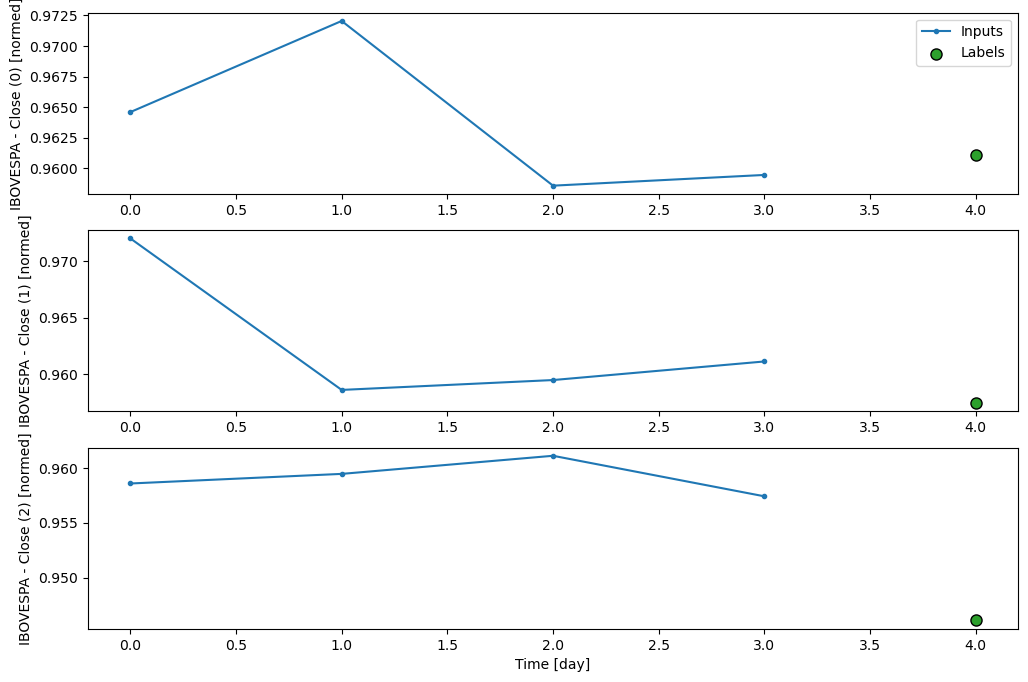

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

2

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8:58 2s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 52.5266 - mean_squared_error: 3.4459e-05 - root_mean_squared_error: 0.0056  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.8215 - mean_squared_error: 4.2147e-05 - root_mean_squared_error: 0.0063

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 37.1037 - mean_squared_error: 4.3954e-05 - root_mean_squared_error: 0.0065

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 33.5699 - mean_squared_error: 5.4788e-05 - root_mean_squared_error: 0.0072

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 31.4567 - mean_squared_error: 7.4923e-05 - root_mean_squared_error: 0.0083

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 30.0707 - mean_squared_error: 9.7629e-05 - root_mean_squared_error: 0.0093

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 28.8398 - mean_squared_error: 1.1408e-04 - root_mean_squared_error: 0.0101

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.8035 - mean_squared_error: 1.2621e-04 - root_mean_squared_error: 0.0106

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 26.9651 - mean_squared_error: 1.4829e-04 - root_mean_squared_error: 0.0114

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 26.3805 - mean_squared_error: 1.6809e-04 - root_mean_squared_error: 0.0121

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 25.9393 - mean_squared_error: 1.8034e-04 - root_mean_squared_error: 0.0126

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 25.5134 - mean_squared_error: 1.9283e-04 - root_mean_squared_error: 0.0130

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 24.9625 - mean_squared_error: 2.1077e-04 - root_mean_squared_error: 0.0136

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 24.4175 - mean_squared_error: 2.5026e-04 - root_mean_squared_error: 0.0146

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 24.0638 - mean_squared_error: 3.7264e-04 - root_mean_squared_error: 0.0165

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 23.7553 - mean_squared_error: 5.8107e-04 - root_mean_squared_error: 0.0194

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 23.4882 - mean_squared_error: 7.5053e-04 - root_mean_squared_error: 0.0216

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 23.3209 - mean_squared_error: 8.4494e-04 - root_mean_squared_error: 0.0229

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 23.0808 - mean_squared_error: 9.6178e-04 - root_mean_squared_error: 0.0245

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 22.7716 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0263    

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 22.4681 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0279

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 22.1899 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0293

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 21.9499 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0308

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 21.7721 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0319

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 21.6441 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0326

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 21.4948 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0335

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 21.3312 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0345

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 21.1545 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0358

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 20.9557 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0372


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 20.8902 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0376 - val_loss: 0.1392 - val_mean_absolute_error: 0.1392 - val_mean_absolute_percentage_error: 14.9234 - val_mean_squared_error: 0.0206 - val_root_mean_squared_error: 0.1435


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6019 - mean_absolute_error: 0.6019 - mean_absolute_percentage_error: 28239.3984 - mean_squared_error: 0.3623 - root_mean_squared_error: 0.6019

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5756 - mean_absolute_error: 0.5756 - mean_absolute_percentage_error: 11612.9209 - mean_squared_error: 0.3330 - root_mean_squared_error: 0.5766 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5049 - mean_absolute_error: 0.5049 - mean_absolute_percentage_error: 8073.9219 - mean_squared_error: 0.2762 - root_mean_squared_error: 0.5214 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4562 - mean_absolute_error: 0.4562 - mean_absolute_percentage_error: 6799.3032 - mean_squared_error: 0.2438 - root_mean_squared_error: 0.4864

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3996 - mean_absolute_error: 0.3996 - mean_absolute_percentage_error: 5555.5156 - mean_squared_error: 0.2077 - root_mean_squared_error: 0.4443

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 4656.3276 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.4082

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 4140.0469 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3850

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 3737.1196 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3655

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 3526.8850 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3547

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 3376.7891 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3468

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 3176.5542 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3359

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 2921.1973 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3214

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 2729.5820 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.3101

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 2603.1956 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.3023

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 2507.3765 - mean_squared_error: 0.1028 - root_mean_squared_error: 0.2963

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2059 - mean_absolute_error: 0.2059 - mean_absolute_percentage_error: 2385.6531 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2885

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 2261.6514 - mean_squared_error: 0.0935 - root_mean_squared_error: 0.2804

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1898 - mean_absolute_error: 0.1898 - mean_absolute_percentage_error: 2151.2471 - mean_squared_error: 0.0893 - root_mean_squared_error: 0.2732

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 2088.1011 - mean_squared_error: 0.0869 - root_mean_squared_error: 0.2690

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 2052.1438 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2666

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 1995.1656 - mean_squared_error: 0.0834 - root_mean_squared_error: 0.2627

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1729 - mean_absolute_error: 0.1729 - mean_absolute_percentage_error: 1900.9653 - mean_squared_error: 0.0798 - root_mean_squared_error: 0.2562

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1671 - mean_absolute_error: 0.1671 - mean_absolute_percentage_error: 1816.0764 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2501

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 1747.3350 - mean_squared_error: 0.0738 - root_mean_squared_error: 0.2451

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1595 - mean_absolute_error: 0.1595 - mean_absolute_percentage_error: 1707.2089 - mean_squared_error: 0.0723 - root_mean_squared_error: 0.2421

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1563 - mean_absolute_error: 0.1563 - mean_absolute_percentage_error: 1661.6614 - mean_squared_error: 0.0705 - root_mean_squared_error: 0.2387

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1547 - mean_absolute_error: 0.1547 - mean_absolute_percentage_error: 1639.8792 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2370

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 1625.7047 - mean_squared_error: 0.0691 - root_mean_squared_error: 0.2360

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1518 - mean_absolute_error: 0.1518 - mean_absolute_percentage_error: 1598.1547 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2339

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 1591.4279 - mean_squared_error: 0.0677 - root_mean_squared_error: 0.2333

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 1584.7633 - mean_squared_error: 0.0675 - root_mean_squared_error: 0.2328

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1482 - mean_absolute_error: 0.1482 - mean_absolute_percentage_error: 1546.0367 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2298

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 1503.4113 - mean_squared_error: 0.0643 - root_mean_squared_error: 0.2265

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 1468.8789 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2237

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 1441.4084 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2216

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 1420.2366 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2199

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 1399.7399 - mean_squared_error: 0.0602 - root_mean_squared_error: 0.2182

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - mean_absolute_percentage_error: 1370.1885 - mean_squared_error: 0.0590 - root_mean_squared_error: 0.2159

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 1346.5900 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2140

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 1337.3988 - mean_squared_error: 0.0578 - root_mean_squared_error: 0.2132

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1327 - mean_absolute_error: 0.1327 - mean_absolute_percentage_error: 1319.4237 - mean_squared_error: 0.0571 - root_mean_squared_error: 0.2118


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1318 - mean_absolute_error: 0.1318 - mean_absolute_percentage_error: 1306.2966 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2107 - val_loss: 0.0346 - val_mean_absolute_error: 0.0346 - val_mean_absolute_percentage_error: 3.6818 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0395


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.4363 - mean_absolute_error: 0.4363 - mean_absolute_percentage_error: 20466.4805 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4363

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4319 - mean_absolute_error: 0.4319 - mean_absolute_percentage_error: 10939.1914 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4320 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.4178 - mean_absolute_error: 0.4178 - mean_absolute_percentage_error: 8018.8809 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.4187 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3860 - mean_absolute_error: 0.3860 - mean_absolute_percentage_error: 6489.0332 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3956

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3326 - mean_absolute_error: 0.3326 - mean_absolute_percentage_error: 5047.0942 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3590 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 4179.3047 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3304

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 3655.2280 - mean_squared_error: 0.1025 - root_mean_squared_error: 0.3104

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 3260.3376 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.2937

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 2911.1804 - mean_squared_error: 0.0844 - root_mean_squared_error: 0.2776

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 2699.3730 - mean_squared_error: 0.0789 - root_mean_squared_error: 0.2672

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 2491.8704 - mean_squared_error: 0.0735 - root_mean_squared_error: 0.2565

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 2317.0574 - mean_squared_error: 0.0689 - root_mean_squared_error: 0.2470

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 2208.0051 - mean_squared_error: 0.0659 - root_mean_squared_error: 0.2409

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1753 - mean_absolute_error: 0.1753 - mean_absolute_percentage_error: 2091.3220 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2341

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1671 - mean_absolute_error: 0.1671 - mean_absolute_percentage_error: 1971.3900 - mean_squared_error: 0.0595 - root_mean_squared_error: 0.2269

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1597 - mean_absolute_error: 0.1597 - mean_absolute_percentage_error: 1865.7931 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2204

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1532 - mean_absolute_error: 0.1532 - mean_absolute_percentage_error: 1772.0182 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2144

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1472 - mean_absolute_error: 0.1472 - mean_absolute_percentage_error: 1688.1136 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2089

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 1612.5625 - mean_squared_error: 0.0494 - root_mean_squared_error: 0.2038

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 1563.0277 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.2005

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 1490.4137 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.1954

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1291 - mean_absolute_error: 0.1291 - mean_absolute_percentage_error: 1432.7196 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.1913

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 1379.7472 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.1875

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1330.9186 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1839

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 1285.7506 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1805

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 1238.0897 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1768

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 1199.4628 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1738

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 1163.3977 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1710

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 1129.6389 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1683

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 1097.9644 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1657

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 1072.3270 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1636

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 1040.1216 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1609

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 1013.6390 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1586

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 988.6000 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1565 

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 964.8840 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1545


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 942.3917 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1526 - val_loss: 0.0341 - val_mean_absolute_error: 0.0341 - val_mean_absolute_percentage_error: 3.6463 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0366


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 4513.0713 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0962

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 1971.2885 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 1306.3634 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0651

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 1006.7856 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0580

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 848.8848 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0538 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 738.4290 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0505

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 656.3948 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 584.4842 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0452

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 534.5496 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 487.9612 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 454.0288 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 432.8378 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 413.7378 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 389.9392 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 374.7177 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 358.1053 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 347.9082 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 338.3359 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 329.3308 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 318.7971 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 305.2437 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 289.5806 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 275.5946 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 263.0231 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 251.6555 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 241.3221 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 231.8833 - mean_squared_error: 9.9987e-04 - root_mean_squared_error: 0.0282

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 223.2236 - mean_squared_error: 9.6584e-04 - root_mean_squared_error: 0.0277

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 215.2471 - mean_squared_error: 9.3444e-04 - root_mean_squared_error: 0.0272

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 207.8743 - mean_squared_error: 9.0556e-04 - root_mean_squared_error: 0.0267

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 201.0397 - mean_squared_error: 8.7997e-04 - root_mean_squared_error: 0.0263

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 194.6844 - mean_squared_error: 8.5709e-04 - root_mean_squared_error: 0.0260

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 188.1233 - mean_squared_error: 8.3400e-04 - root_mean_squared_error: 0.0256


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 186.2503 - mean_squared_error: 8.2745e-04 - root_mean_squared_error: 0.0255 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1823 - val_mean_squared_error: 1.8819e-04 - val_root_mean_squared_error: 0.0137


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 2788.4487 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0595

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 1118.4459 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 783.7541 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 618.0777 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 516.4744 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 455.2094 - mean_squared_error: 9.4625e-04 - root_mean_squared_error: 0.0290

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 395.0735 - mean_squared_error: 8.3620e-04 - root_mean_squared_error: 0.0271

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 350.3895 - mean_squared_error: 7.5192e-04 - root_mean_squared_error: 0.0255

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 319.6152 - mean_squared_error: 6.9268e-04 - root_mean_squared_error: 0.0244

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 301.0818 - mean_squared_error: 6.5645e-04 - root_mean_squared_error: 0.0236

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 291.0718 - mean_squared_error: 6.3670e-04 - root_mean_squared_error: 0.0232

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 273.1324 - mean_squared_error: 6.0099e-04 - root_mean_squared_error: 0.0225

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 255.0863 - mean_squared_error: 5.6468e-04 - root_mean_squared_error: 0.0217

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 239.5065 - mean_squared_error: 5.3304e-04 - root_mean_squared_error: 0.0210

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 227.7400 - mean_squared_error: 5.0896e-04 - root_mean_squared_error: 0.0205

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 215.5365 - mean_squared_error: 4.8389e-04 - root_mean_squared_error: 0.0199

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 206.1743 - mean_squared_error: 4.6461e-04 - root_mean_squared_error: 0.0195

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 195.0094 - mean_squared_error: 4.4176e-04 - root_mean_squared_error: 0.0189

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 187.4797 - mean_squared_error: 4.2665e-04 - root_mean_squared_error: 0.0186

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 179.4728 - mean_squared_error: 4.1072e-04 - root_mean_squared_error: 0.0182

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 174.2023 - mean_squared_error: 4.0028e-04 - root_mean_squared_error: 0.0179

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 168.3129 - mean_squared_error: 3.8861e-04 - root_mean_squared_error: 0.0177

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 161.9755 - mean_squared_error: 3.7606e-04 - root_mean_squared_error: 0.0174

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 156.1448 - mean_squared_error: 3.6452e-04 - root_mean_squared_error: 0.0171

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 150.7601 - mean_squared_error: 3.5382e-04 - root_mean_squared_error: 0.0168

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 147.8636 - mean_squared_error: 3.4806e-04 - root_mean_squared_error: 0.0167

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 144.4121 - mean_squared_error: 3.4121e-04 - root_mean_squared_error: 0.0165

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 139.8695 - mean_squared_error: 3.3222e-04 - root_mean_squared_error: 0.0163

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 135.0506 - mean_squared_error: 3.2270e-04 - root_mean_squared_error: 0.0160

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 131.6704 - mean_squared_error: 3.1602e-04 - root_mean_squared_error: 0.0158

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 128.4717 - mean_squared_error: 3.0971e-04 - root_mean_squared_error: 0.0157

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 124.4649 - mean_squared_error: 3.0193e-04 - root_mean_squared_error: 0.0155

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 119.8303 - mean_squared_error: 2.9383e-04 - root_mean_squared_error: 0.0153

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 115.9778 - mean_squared_error: 2.8931e-04 - root_mean_squared_error: 0.0152

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 112.0092 - mean_squared_error: 2.8632e-04 - root_mean_squared_error: 0.0152


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 109.4075 - mean_squared_error: 2.8513e-04 - root_mean_squared_error: 0.0152 - val_loss: 0.0369 - val_mean_absolute_error: 0.0369 - val_mean_absolute_percentage_error: 3.9540 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0388


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 2082.6008 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 779.0705 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 534.4946 - mean_squared_error: 9.4287e-04 - root_mean_squared_error: 0.0303

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 418.8102 - mean_squared_error: 8.2258e-04 - root_mean_squared_error: 0.0282

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 348.3629 - mean_squared_error: 7.2789e-04 - root_mean_squared_error: 0.0264

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 295.9798 - mean_squared_error: 6.4666e-04 - root_mean_squared_error: 0.0248

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 268.7849 - mean_squared_error: 6.0189e-04 - root_mean_squared_error: 0.0238

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 238.4989 - mean_squared_error: 5.4985e-04 - root_mean_squared_error: 0.0226

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 215.0813 - mean_squared_error: 5.0760e-04 - root_mean_squared_error: 0.0217

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 198.0375 - mean_squared_error: 4.7562e-04 - root_mean_squared_error: 0.0209

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 183.7931 - mean_squared_error: 4.4849e-04 - root_mean_squared_error: 0.0202

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 171.6909 - mean_squared_error: 4.2580e-04 - root_mean_squared_error: 0.0197

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 160.1930 - mean_squared_error: 4.0515e-04 - root_mean_squared_error: 0.0192

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 151.2306 - mean_squared_error: 3.8965e-04 - root_mean_squared_error: 0.0188

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 143.3285 - mean_squared_error: 3.7612e-04 - root_mean_squared_error: 0.0184

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 136.3000 - mean_squared_error: 3.6413e-04 - root_mean_squared_error: 0.0181

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 129.3449 - mean_squared_error: 3.5239e-04 - root_mean_squared_error: 0.0179

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 123.7347 - mean_squared_error: 3.4321e-04 - root_mean_squared_error: 0.0176

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 118.1063 - mean_squared_error: 3.3373e-04 - root_mean_squared_error: 0.0174

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 113.5084 - mean_squared_error: 3.2578e-04 - root_mean_squared_error: 0.0172

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 109.2933 - mean_squared_error: 3.1829e-04 - root_mean_squared_error: 0.0170

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 105.4124 - mean_squared_error: 3.1123e-04 - root_mean_squared_error: 0.0168

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 101.8266 - mean_squared_error: 3.0462e-04 - root_mean_squared_error: 0.0166

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 98.5026 - mean_squared_error: 2.9864e-04 - root_mean_squared_error: 0.0164 

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 96.0805 - mean_squared_error: 2.9455e-04 - root_mean_squared_error: 0.0163

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 93.1548 - mean_squared_error: 2.8970e-04 - root_mean_squared_error: 0.0162

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 90.1285 - mean_squared_error: 2.8476e-04 - root_mean_squared_error: 0.0161


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 89.8384 - mean_squared_error: 2.8429e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7807 - val_mean_squared_error: 8.0370e-05 - val_root_mean_squared_error: 0.0090


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 2320.9702 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0494

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 868.3646 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 578.0668 - mean_squared_error: 9.0135e-04 - root_mean_squared_error: 0.0286

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 434.2941 - mean_squared_error: 6.9574e-04 - root_mean_squared_error: 0.0248

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 359.0211 - mean_squared_error: 5.8361e-04 - root_mean_squared_error: 0.0224

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 312.8736 - mean_squared_error: 5.1324e-04 - root_mean_squared_error: 0.0209

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 294.4227 - mean_squared_error: 4.8481e-04 - root_mean_squared_error: 0.0202

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 286.0851 - mean_squared_error: 4.7195e-04 - root_mean_squared_error: 0.0199

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 274.5269 - mean_squared_error: 4.5406e-04 - root_mean_squared_error: 0.0195

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 257.4209 - mean_squared_error: 4.2746e-04 - root_mean_squared_error: 0.0188

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 234.5074 - mean_squared_error: 3.9158e-04 - root_mean_squared_error: 0.0179

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 215.7370 - mean_squared_error: 3.6199e-04 - root_mean_squared_error: 0.0171

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 198.2467 - mean_squared_error: 3.3428e-04 - root_mean_squared_error: 0.0164

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 183.6344 - mean_squared_error: 3.1100e-04 - root_mean_squared_error: 0.0157

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 172.5095 - mean_squared_error: 2.9326e-04 - root_mean_squared_error: 0.0152

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 161.6496 - mean_squared_error: 2.7603e-04 - root_mean_squared_error: 0.0147

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 153.1934 - mean_squared_error: 2.6298e-04 - root_mean_squared_error: 0.0143

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 145.6646 - mean_squared_error: 2.5160e-04 - root_mean_squared_error: 0.0140

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 138.1153 - mean_squared_error: 2.4029e-04 - root_mean_squared_error: 0.0137

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 131.3828 - mean_squared_error: 2.3026e-04 - root_mean_squared_error: 0.0134

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 125.3378 - mean_squared_error: 2.2130e-04 - root_mean_squared_error: 0.0131

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 119.8765 - mean_squared_error: 2.1319e-04 - root_mean_squared_error: 0.0128

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 114.9164 - mean_squared_error: 2.0583e-04 - root_mean_squared_error: 0.0126

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 110.3895 - mean_squared_error: 1.9913e-04 - root_mean_squared_error: 0.0124

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 106.2397 - mean_squared_error: 1.9302e-04 - root_mean_squared_error: 0.0122

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 102.8293 - mean_squared_error: 1.8802e-04 - root_mean_squared_error: 0.0121

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 100.0373 - mean_squared_error: 1.8399e-04 - root_mean_squared_error: 0.0119

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 97.4077 - mean_squared_error: 1.8036e-04 - root_mean_squared_error: 0.0118 

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 94.9268 - mean_squared_error: 1.7711e-04 - root_mean_squared_error: 0.0117

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 92.2568 - mean_squared_error: 1.7376e-04 - root_mean_squared_error: 0.0116

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 89.4447 - mean_squared_error: 1.7043e-04 - root_mean_squared_error: 0.0115


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 88.5496 - mean_squared_error: 1.6940e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7045 - val_mean_squared_error: 6.6120e-05 - val_root_mean_squared_error: 0.0081


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 2604.3523 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0554

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 1324.1118 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 893.1866 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 670.0123 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 517.4975 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 452.5857 - mean_squared_error: 9.2395e-04 - root_mean_squared_error: 0.0288

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 418.6391 - mean_squared_error: 8.6162e-04 - root_mean_squared_error: 0.0277

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 383.5525 - mean_squared_error: 7.9633e-04 - root_mean_squared_error: 0.0265

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 334.6582 - mean_squared_error: 7.0418e-04 - root_mean_squared_error: 0.0247

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 294.3866 - mean_squared_error: 6.2681e-04 - root_mean_squared_error: 0.0231

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 272.0982 - mean_squared_error: 5.8350e-04 - root_mean_squared_error: 0.0222

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 258.3889 - mean_squared_error: 5.5678e-04 - root_mean_squared_error: 0.0216

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 241.6069 - mean_squared_error: 5.2383e-04 - root_mean_squared_error: 0.0209

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 225.1682 - mean_squared_error: 4.9123e-04 - root_mean_squared_error: 0.0202

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 212.6953 - mean_squared_error: 4.6632e-04 - root_mean_squared_error: 0.0196

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 204.6860 - mean_squared_error: 4.5026e-04 - root_mean_squared_error: 0.0192

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 197.3198 - mean_squared_error: 4.3546e-04 - root_mean_squared_error: 0.0189

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 186.6845 - mean_squared_error: 4.1420e-04 - root_mean_squared_error: 0.0183

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 176.1458 - mean_squared_error: 3.9345e-04 - root_mean_squared_error: 0.0178

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 166.8463 - mean_squared_error: 3.7518e-04 - root_mean_squared_error: 0.0174

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 160.3306 - mean_squared_error: 3.6233e-04 - root_mean_squared_error: 0.0171

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 156.0111 - mean_squared_error: 3.5382e-04 - root_mean_squared_error: 0.0168

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 151.1565 - mean_squared_error: 3.4427e-04 - root_mean_squared_error: 0.0166

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 144.4700 - mean_squared_error: 3.3107e-04 - root_mean_squared_error: 0.0163

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 138.4067 - mean_squared_error: 3.1908e-04 - root_mean_squared_error: 0.0159

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 132.8808 - mean_squared_error: 3.0813e-04 - root_mean_squared_error: 0.0156

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 128.3631 - mean_squared_error: 2.9919e-04 - root_mean_squared_error: 0.0154

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 125.1913 - mean_squared_error: 2.9292e-04 - root_mean_squared_error: 0.0152

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 122.1880 - mean_squared_error: 2.8700e-04 - root_mean_squared_error: 0.0151

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 117.9698 - mean_squared_error: 2.7873e-04 - root_mean_squared_error: 0.0148

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 114.0614 - mean_squared_error: 2.7139e-04 - root_mean_squared_error: 0.0147

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 110.4290 - mean_squared_error: 2.6480e-04 - root_mean_squared_error: 0.0145

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 106.6812 - mean_squared_error: 2.5820e-04 - root_mean_squared_error: 0.0143


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 104.9115 - mean_squared_error: 2.5516e-04 - root_mean_squared_error: 0.0142 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8285 - val_mean_squared_error: 8.6307e-05 - val_root_mean_squared_error: 0.0093


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 2355.8013 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0501

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 898.9358 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 612.5002 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 479.5055 - mean_squared_error: 9.7886e-04 - root_mean_squared_error: 0.0305

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 399.0535 - mean_squared_error: 8.6466e-04 - root_mean_squared_error: 0.0286

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 339.2968 - mean_squared_error: 7.6830e-04 - root_mean_squared_error: 0.0268

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 304.2083 - mean_squared_error: 7.0645e-04 - root_mean_squared_error: 0.0256

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 276.3950 - mean_squared_error: 6.5462e-04 - root_mean_squared_error: 0.0246

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 256.3593 - mean_squared_error: 6.1580e-04 - root_mean_squared_error: 0.0237

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 234.9423 - mean_squared_error: 5.7295e-04 - root_mean_squared_error: 0.0228

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 215.3989 - mean_squared_error: 5.3282e-04 - root_mean_squared_error: 0.0219

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 200.6761 - mean_squared_error: 5.0206e-04 - root_mean_squared_error: 0.0212

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 188.0419 - mean_squared_error: 4.7548e-04 - root_mean_squared_error: 0.0205

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 177.0648 - mean_squared_error: 4.5241e-04 - root_mean_squared_error: 0.0200

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 168.4443 - mean_squared_error: 4.3446e-04 - root_mean_squared_error: 0.0195

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 159.7999 - mean_squared_error: 4.1647e-04 - root_mean_squared_error: 0.0191

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 152.0882 - mean_squared_error: 4.0031e-04 - root_mean_squared_error: 0.0187

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 145.1611 - mean_squared_error: 3.8565e-04 - root_mean_squared_error: 0.0183

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 138.2428 - mean_squared_error: 3.7089e-04 - root_mean_squared_error: 0.0179

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 132.6142 - mean_squared_error: 3.5878e-04 - root_mean_squared_error: 0.0176

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 126.9296 - mean_squared_error: 3.4652e-04 - root_mean_squared_error: 0.0173

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 121.7640 - mean_squared_error: 3.3553e-04 - root_mean_squared_error: 0.0170

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 117.4993 - mean_squared_error: 3.2659e-04 - root_mean_squared_error: 0.0168

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 113.5547 - mean_squared_error: 3.1861e-04 - root_mean_squared_error: 0.0165

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 109.8968 - mean_squared_error: 3.1234e-04 - root_mean_squared_error: 0.0164

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 106.1301 - mean_squared_error: 3.0705e-04 - root_mean_squared_error: 0.0163

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 102.9780 - mean_squared_error: 3.0293e-04 - root_mean_squared_error: 0.0162


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 101.9737 - mean_squared_error: 3.0161e-04 - root_mean_squared_error: 0.0162 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8400 - val_mean_squared_error: 9.7954e-05 - val_root_mean_squared_error: 0.0099


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 3951.4592 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0841

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 1549.5624 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 1009.9135 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 787.4556 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0494 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 640.2383 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 551.8184 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 486.8795 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 436.9234 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 401.2413 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 371.5050 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 346.2791 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 324.5845 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 305.7088 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 289.1156 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 274.4040 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 261.2634 - mean_squared_error: 9.6144e-04 - root_mean_squared_error: 0.0275

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 249.4454 - mean_squared_error: 9.2244e-04 - root_mean_squared_error: 0.0269

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 238.7542 - mean_squared_error: 8.8742e-04 - root_mean_squared_error: 0.0263

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 229.0284 - mean_squared_error: 8.5550e-04 - root_mean_squared_error: 0.0258

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 219.0802 - mean_squared_error: 8.2267e-04 - root_mean_squared_error: 0.0253

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 211.9779 - mean_squared_error: 7.9916e-04 - root_mean_squared_error: 0.0249

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 205.3657 - mean_squared_error: 7.7720e-04 - root_mean_squared_error: 0.0245

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 198.3463 - mean_squared_error: 7.5395e-04 - root_mean_squared_error: 0.0242

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 191.8381 - mean_squared_error: 7.3261e-04 - root_mean_squared_error: 0.0238

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 185.7863 - mean_squared_error: 7.1324e-04 - root_mean_squared_error: 0.0235

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 180.1413 - mean_squared_error: 6.9536e-04 - root_mean_squared_error: 0.0232

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 174.8629 - mean_squared_error: 6.7910e-04 - root_mean_squared_error: 0.0229

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 169.9148 - mean_squared_error: 6.6412e-04 - root_mean_squared_error: 0.0227

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 165.2656 - mean_squared_error: 6.5014e-04 - root_mean_squared_error: 0.0224


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 161.9595 - mean_squared_error: 6.4023e-04 - root_mean_squared_error: 0.0223 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7859 - val_mean_squared_error: 8.5191e-05 - val_root_mean_squared_error: 0.0092


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 3842.4312 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0818

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 1602.1350 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 1090.1270 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0574

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 846.2234 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0507 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 699.1644 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0459

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 589.3469 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 512.0964 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 448.9012 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 405.1716 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 369.9661 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 340.9337 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 319.0543 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 302.3095 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 289.4301 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 279.5893 - mean_squared_error: 9.9298e-04 - root_mean_squared_error: 0.0280

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 268.7167 - mean_squared_error: 9.5676e-04 - root_mean_squared_error: 0.0274

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 255.5951 - mean_squared_error: 9.1313e-04 - root_mean_squared_error: 0.0267

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 243.8144 - mean_squared_error: 8.7406e-04 - root_mean_squared_error: 0.0261

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 233.1728 - mean_squared_error: 8.3881e-04 - root_mean_squared_error: 0.0255

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 223.5087 - mean_squared_error: 8.0687e-04 - root_mean_squared_error: 0.0249

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 214.6882 - mean_squared_error: 7.7768e-04 - root_mean_squared_error: 0.0244

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 206.6026 - mean_squared_error: 7.5091e-04 - root_mean_squared_error: 0.0240

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 199.1620 - mean_squared_error: 7.2633e-04 - root_mean_squared_error: 0.0235

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 192.2887 - mean_squared_error: 7.0359e-04 - root_mean_squared_error: 0.0231

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 185.9173 - mean_squared_error: 6.8245e-04 - root_mean_squared_error: 0.0228

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 179.9932 - mean_squared_error: 6.6280e-04 - root_mean_squared_error: 0.0224

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 174.4700 - mean_squared_error: 6.4459e-04 - root_mean_squared_error: 0.0221

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 168.6877 - mean_squared_error: 6.2650e-04 - root_mean_squared_error: 0.0218

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 163.3130 - mean_squared_error: 6.1035e-04 - root_mean_squared_error: 0.0215

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 159.3863 - mean_squared_error: 5.9873e-04 - root_mean_squared_error: 0.0213


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 156.1830 - mean_squared_error: 5.8928e-04 - root_mean_squared_error: 0.0211 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9799 - val_mean_squared_error: 1.2959e-04 - val_root_mean_squared_error: 0.0114


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 3563.4878 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0759

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 1396.3169 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 939.8921 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0512 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 725.4473 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0449

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 608.9997 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 536.6025 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 488.2798 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 454.8595 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 420.9290 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 392.2122 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 360.1041 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 333.3505 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 310.6663 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 291.1601 - mean_squared_error: 9.4699e-04 - root_mean_squared_error: 0.0276

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 274.1882 - mean_squared_error: 8.9476e-04 - root_mean_squared_error: 0.0267

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 259.2699 - mean_squared_error: 8.4897e-04 - root_mean_squared_error: 0.0259

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 246.0461 - mean_squared_error: 8.0866e-04 - root_mean_squared_error: 0.0252

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 234.2346 - mean_squared_error: 7.7285e-04 - root_mean_squared_error: 0.0246

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 223.6112 - mean_squared_error: 7.4071e-04 - root_mean_squared_error: 0.0240

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 214.0002 - mean_squared_error: 7.1167e-04 - root_mean_squared_error: 0.0235

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 205.2594 - mean_squared_error: 6.8528e-04 - root_mean_squared_error: 0.0230

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 197.2713 - mean_squared_error: 6.6111e-04 - root_mean_squared_error: 0.0226

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 189.0674 - mean_squared_error: 6.3635e-04 - root_mean_squared_error: 0.0221

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 181.5837 - mean_squared_error: 6.1384e-04 - root_mean_squared_error: 0.0217

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 173.9974 - mean_squared_error: 5.9096e-04 - root_mean_squared_error: 0.0213

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 167.7414 - mean_squared_error: 5.7208e-04 - root_mean_squared_error: 0.0209

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 162.5823 - mean_squared_error: 5.5669e-04 - root_mean_squared_error: 0.0206

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 157.7633 - mean_squared_error: 5.4327e-04 - root_mean_squared_error: 0.0204

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 153.2518 - mean_squared_error: 5.3207e-04 - root_mean_squared_error: 0.0202

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 149.0174 - mean_squared_error: 5.2225e-04 - root_mean_squared_error: 0.0200


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 145.0348 - mean_squared_error: 5.1335e-04 - root_mean_squared_error: 0.0199 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0229 - val_mean_squared_error: 1.3539e-04 - val_root_mean_squared_error: 0.0116


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 3174.7969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0676

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 1317.9758 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0554 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 871.9489 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0469 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 689.1406 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 575.8717 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 506.2131 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 446.5869 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 395.7910 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 356.3904 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 324.8344 - mean_squared_error: 9.9775e-04 - root_mean_squared_error: 0.0293

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 296.3265 - mean_squared_error: 9.1723e-04 - root_mean_squared_error: 0.0279

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 275.0345 - mean_squared_error: 8.5653e-04 - root_mean_squared_error: 0.0269

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 256.8938 - mean_squared_error: 8.0491e-04 - root_mean_squared_error: 0.0259

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 241.2299 - mean_squared_error: 7.6072e-04 - root_mean_squared_error: 0.0251

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 226.1432 - mean_squared_error: 7.1915e-04 - root_mean_squared_error: 0.0244

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 214.2594 - mean_squared_error: 6.8804e-04 - root_mean_squared_error: 0.0238

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 204.8062 - mean_squared_error: 6.6417e-04 - root_mean_squared_error: 0.0234

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 196.2359 - mean_squared_error: 6.4255e-04 - root_mean_squared_error: 0.0230

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 188.4234 - mean_squared_error: 6.2255e-04 - root_mean_squared_error: 0.0226

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 181.2690 - mean_squared_error: 6.0395e-04 - root_mean_squared_error: 0.0223

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 174.6909 - mean_squared_error: 5.8665e-04 - root_mean_squared_error: 0.0220

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 169.3534 - mean_squared_error: 5.7246e-04 - root_mean_squared_error: 0.0217

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 164.3642 - mean_squared_error: 5.5907e-04 - root_mean_squared_error: 0.0214

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 159.0452 - mean_squared_error: 5.4468e-04 - root_mean_squared_error: 0.0211

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 154.0926 - mean_squared_error: 5.3119e-04 - root_mean_squared_error: 0.0209

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 149.4688 - mean_squared_error: 5.1860e-04 - root_mean_squared_error: 0.0206

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 144.6201 - mean_squared_error: 5.0557e-04 - root_mean_squared_error: 0.0204

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 140.5921 - mean_squared_error: 4.9476e-04 - root_mean_squared_error: 0.0201

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 136.8040 - mean_squared_error: 4.8460e-04 - root_mean_squared_error: 0.0199


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 134.9940 - mean_squared_error: 4.7975e-04 - root_mean_squared_error: 0.0198 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6786 - val_mean_squared_error: 6.2153e-05 - val_root_mean_squared_error: 0.0079


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 1793.0398 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 726.1379 - mean_squared_error: 8.8026e-04 - root_mean_squared_error: 0.0292

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 464.4774 - mean_squared_error: 6.4277e-04 - root_mean_squared_error: 0.0247

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 370.4536 - mean_squared_error: 5.4106e-04 - root_mean_squared_error: 0.0225

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 330.6753 - mean_squared_error: 4.9378e-04 - root_mean_squared_error: 0.0214

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 283.8168 - mean_squared_error: 4.3499e-04 - root_mean_squared_error: 0.0199

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 242.8390 - mean_squared_error: 3.8165e-04 - root_mean_squared_error: 0.0186

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 218.5061 - mean_squared_error: 3.4895e-04 - root_mean_squared_error: 0.0177

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 196.9323 - mean_squared_error: 3.1913e-04 - root_mean_squared_error: 0.0168

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 186.9081 - mean_squared_error: 3.0506e-04 - root_mean_squared_error: 0.0164

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 176.3096 - mean_squared_error: 2.9006e-04 - root_mean_squared_error: 0.0159

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 164.1091 - mean_squared_error: 2.7257e-04 - root_mean_squared_error: 0.0154

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 151.2743 - mean_squared_error: 2.5394e-04 - root_mean_squared_error: 0.0148

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 144.5978 - mean_squared_error: 2.4433e-04 - root_mean_squared_error: 0.0145

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 139.5176 - mean_squared_error: 2.3703e-04 - root_mean_squared_error: 0.0142

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 134.8216 - mean_squared_error: 2.3038e-04 - root_mean_squared_error: 0.0140

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 128.8133 - mean_squared_error: 2.2215e-04 - root_mean_squared_error: 0.0138

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 121.2041 - mean_squared_error: 2.1226e-04 - root_mean_squared_error: 0.0134

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 115.1650 - mean_squared_error: 2.0466e-04 - root_mean_squared_error: 0.0132

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 111.4984 - mean_squared_error: 2.0006e-04 - root_mean_squared_error: 0.0131

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 108.6361 - mean_squared_error: 1.9647e-04 - root_mean_squared_error: 0.0129

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 104.8931 - mean_squared_error: 1.9173e-04 - root_mean_squared_error: 0.0128

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 101.9058 - mean_squared_error: 1.8790e-04 - root_mean_squared_error: 0.0127

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 98.2054 - mean_squared_error: 1.8311e-04 - root_mean_squared_error: 0.0125 

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 95.2046 - mean_squared_error: 1.7920e-04 - root_mean_squared_error: 0.0124

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 93.5799 - mean_squared_error: 1.7708e-04 - root_mean_squared_error: 0.0123

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 91.6340 - mean_squared_error: 1.7454e-04 - root_mean_squared_error: 0.0122

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 88.7010 - mean_squared_error: 1.7071e-04 - root_mean_squared_error: 0.0121

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 85.9695 - mean_squared_error: 1.6718e-04 - root_mean_squared_error: 0.0120

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 82.8074 - mean_squared_error: 1.6333e-04 - root_mean_squared_error: 0.0118

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 80.1758 - mean_squared_error: 1.6064e-04 - root_mean_squared_error: 0.0118

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 77.7246 - mean_squared_error: 1.5849e-04 - root_mean_squared_error: 0.0117


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 75.4356 - mean_squared_error: 1.5670e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1654 - val_mean_squared_error: 1.7337e-04 - val_root_mean_squared_error: 0.0132


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 2941.7666 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0627

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 1150.9216 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 754.9064 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 605.5024 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 500.5292 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 429.6263 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 378.0228 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 334.7318 - mean_squared_error: 9.1716e-04 - root_mean_squared_error: 0.0281

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 307.3176 - mean_squared_error: 8.4778e-04 - root_mean_squared_error: 0.0269

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 281.9030 - mean_squared_error: 7.8275e-04 - root_mean_squared_error: 0.0257

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 260.7614 - mean_squared_error: 7.2815e-04 - root_mean_squared_error: 0.0246

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 242.8646 - mean_squared_error: 6.8162e-04 - root_mean_squared_error: 0.0237

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 229.0968 - mean_squared_error: 6.4575e-04 - root_mean_squared_error: 0.0230

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 215.5390 - mean_squared_error: 6.1062e-04 - root_mean_squared_error: 0.0223

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 203.6517 - mean_squared_error: 5.8008e-04 - root_mean_squared_error: 0.0217

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 192.0371 - mean_squared_error: 5.5038e-04 - root_mean_squared_error: 0.0211

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 182.7693 - mean_squared_error: 5.2677e-04 - root_mean_squared_error: 0.0206

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 173.5672 - mean_squared_error: 5.0340e-04 - root_mean_squared_error: 0.0201

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 166.1178 - mean_squared_error: 4.8437e-04 - root_mean_squared_error: 0.0196

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 159.3436 - mean_squared_error: 4.6711e-04 - root_mean_squared_error: 0.0193

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 155.1569 - mean_squared_error: 4.5641e-04 - root_mean_squared_error: 0.0190

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 149.9383 - mean_squared_error: 4.4304e-04 - root_mean_squared_error: 0.0187

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 145.0927 - mean_squared_error: 4.3060e-04 - root_mean_squared_error: 0.0184

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 140.0388 - mean_squared_error: 4.1774e-04 - root_mean_squared_error: 0.0182

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 135.3602 - mean_squared_error: 4.0643e-04 - root_mean_squared_error: 0.0179

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 131.0176 - mean_squared_error: 3.9735e-04 - root_mean_squared_error: 0.0177

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 126.9752 - mean_squared_error: 3.9041e-04 - root_mean_squared_error: 0.0176


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 123.6086 - mean_squared_error: 3.8506e-04 - root_mean_squared_error: 0.0175 - val_loss: 0.0163 - val_mean_absolute_error: 0.0163 - val_mean_absolute_percentage_error: 1.7448 - val_mean_squared_error: 3.2737e-04 - val_root_mean_squared_error: 0.0181


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 2163.0112 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 789.9481 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 568.6125 - mean_squared_error: 9.9012e-04 - root_mean_squared_error: 0.0307

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 443.9048 - mean_squared_error: 8.2585e-04 - root_mean_squared_error: 0.0279

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 368.5848 - mean_squared_error: 7.1554e-04 - root_mean_squared_error: 0.0258

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 317.4706 - mean_squared_error: 6.3467e-04 - root_mean_squared_error: 0.0241

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 280.0989 - mean_squared_error: 5.7219e-04 - root_mean_squared_error: 0.0228

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 248.6410 - mean_squared_error: 5.1739e-04 - root_mean_squared_error: 0.0215

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 226.4120 - mean_squared_error: 4.7741e-04 - root_mean_squared_error: 0.0206

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 208.2206 - mean_squared_error: 4.4390e-04 - root_mean_squared_error: 0.0198

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 193.0199 - mean_squared_error: 4.1542e-04 - root_mean_squared_error: 0.0190

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 178.7858 - mean_squared_error: 3.8839e-04 - root_mean_squared_error: 0.0183

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 168.9749 - mean_squared_error: 3.6968e-04 - root_mean_squared_error: 0.0178

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 159.2809 - mean_squared_error: 3.5159e-04 - root_mean_squared_error: 0.0173

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 150.7540 - mean_squared_error: 3.3597e-04 - root_mean_squared_error: 0.0169

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 143.1844 - mean_squared_error: 3.2214e-04 - root_mean_squared_error: 0.0166

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 136.4145 - mean_squared_error: 3.0974e-04 - root_mean_squared_error: 0.0162

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 130.3206 - mean_squared_error: 2.9859e-04 - root_mean_squared_error: 0.0159

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 124.2209 - mean_squared_error: 2.8732e-04 - root_mean_squared_error: 0.0156

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 119.2484 - mean_squared_error: 2.7808e-04 - root_mean_squared_error: 0.0153

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 114.6987 - mean_squared_error: 2.6956e-04 - root_mean_squared_error: 0.0151

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 110.5179 - mean_squared_error: 2.6171e-04 - root_mean_squared_error: 0.0148

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 106.6614 - mean_squared_error: 2.5446e-04 - root_mean_squared_error: 0.0146

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 103.0918 - mean_squared_error: 2.4786e-04 - root_mean_squared_error: 0.0144

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 99.4244 - mean_squared_error: 2.4148e-04 - root_mean_squared_error: 0.0142 

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 96.3622 - mean_squared_error: 2.3627e-04 - root_mean_squared_error: 0.0141


Epoch: 16 - LR: 0.006695074494928122


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 93.1965 - mean_squared_error: 2.3098e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.8034 - val_mean_squared_error: 8.2283e-05 - val_root_mean_squared_error: 0.0091


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 1874.3745 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 716.5067 - mean_squared_error: 9.2661e-04 - root_mean_squared_error: 0.0298

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 479.2578 - mean_squared_error: 6.5358e-04 - root_mean_squared_error: 0.0245

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 378.0621 - mean_squared_error: 5.2610e-04 - root_mean_squared_error: 0.0217

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 321.8218 - mean_squared_error: 4.5306e-04 - root_mean_squared_error: 0.0199

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 267.6396 - mean_squared_error: 3.8134e-04 - root_mean_squared_error: 0.0181

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 233.7026 - mean_squared_error: 3.3581e-04 - root_mean_squared_error: 0.0168

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 205.6770 - mean_squared_error: 2.9782e-04 - root_mean_squared_error: 0.0157

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 186.1470 - mean_squared_error: 2.7107e-04 - root_mean_squared_error: 0.0149

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 170.3453 - mean_squared_error: 2.4926e-04 - root_mean_squared_error: 0.0142

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 157.2618 - mean_squared_error: 2.3116e-04 - root_mean_squared_error: 0.0136

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 145.1103 - mean_squared_error: 2.1439e-04 - root_mean_squared_error: 0.0130

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 136.7892 - mean_squared_error: 2.0300e-04 - root_mean_squared_error: 0.0126

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 129.4630 - mean_squared_error: 1.9327e-04 - root_mean_squared_error: 0.0123

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 122.1989 - mean_squared_error: 1.8403e-04 - root_mean_squared_error: 0.0120

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 115.7834 - mean_squared_error: 1.7599e-04 - root_mean_squared_error: 0.0117

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 110.0710 - mean_squared_error: 1.6886e-04 - root_mean_squared_error: 0.0115

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 104.9492 - mean_squared_error: 1.6250e-04 - root_mean_squared_error: 0.0113

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.3279 - mean_squared_error: 1.5675e-04 - root_mean_squared_error: 0.0111

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 95.6933 - mean_squared_error: 1.5099e-04 - root_mean_squared_error: 0.0109 

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 91.5094 - mean_squared_error: 1.4583e-04 - root_mean_squared_error: 0.0107

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 88.0763 - mean_squared_error: 1.4170e-04 - root_mean_squared_error: 0.0106

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 85.2552 - mean_squared_error: 1.3839e-04 - root_mean_squared_error: 0.0104

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 82.3114 - mean_squared_error: 1.3506e-04 - root_mean_squared_error: 0.0103

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 79.5853 - mean_squared_error: 1.3260e-04 - root_mean_squared_error: 0.0103

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 77.0530 - mean_squared_error: 1.3082e-04 - root_mean_squared_error: 0.0102

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 74.6932 - mean_squared_error: 1.2937e-04 - root_mean_squared_error: 0.0102


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 73.4506 - mean_squared_error: 1.2864e-04 - root_mean_squared_error: 0.0102 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7631 - val_mean_squared_error: 7.9687e-05 - val_root_mean_squared_error: 0.0089


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 2975.9734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0634

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 1101.3015 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0498 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 784.6508 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0427 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 592.7133 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 491.8525 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 423.1559 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 372.8819 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 330.5616 - mean_squared_error: 9.0004e-04 - root_mean_squared_error: 0.0277

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 300.6575 - mean_squared_error: 8.2419e-04 - root_mean_squared_error: 0.0263

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 276.2073 - mean_squared_error: 7.6152e-04 - root_mean_squared_error: 0.0252

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 255.8025 - mean_squared_error: 7.0885e-04 - root_mean_squared_error: 0.0241

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 236.7180 - mean_squared_error: 6.5936e-04 - root_mean_squared_error: 0.0232

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 222.0466 - mean_squared_error: 6.2131e-04 - root_mean_squared_error: 0.0224

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 209.2590 - mean_squared_error: 5.8842e-04 - root_mean_squared_error: 0.0217

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 196.8331 - mean_squared_error: 5.5652e-04 - root_mean_squared_error: 0.0211

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 186.9632 - mean_squared_error: 5.3114e-04 - root_mean_squared_error: 0.0205

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 180.0104 - mean_squared_error: 5.1323e-04 - root_mean_squared_error: 0.0202

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 171.8671 - mean_squared_error: 4.9220e-04 - root_mean_squared_error: 0.0197

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 164.4970 - mean_squared_error: 4.7310e-04 - root_mean_squared_error: 0.0193

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 157.7921 - mean_squared_error: 4.5569e-04 - root_mean_squared_error: 0.0189

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 151.6638 - mean_squared_error: 4.3975e-04 - root_mean_squared_error: 0.0185

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 146.6405 - mean_squared_error: 4.2669e-04 - root_mean_squared_error: 0.0182

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 141.4096 - mean_squared_error: 4.1311e-04 - root_mean_squared_error: 0.0179

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 136.5738 - mean_squared_error: 4.0066e-04 - root_mean_squared_error: 0.0176

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 131.6122 - mean_squared_error: 3.8860e-04 - root_mean_squared_error: 0.0173

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 127.4749 - mean_squared_error: 3.7887e-04 - root_mean_squared_error: 0.0171

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 123.2017 - mean_squared_error: 3.6900e-04 - root_mean_squared_error: 0.0169


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 122.7923 - mean_squared_error: 3.6806e-04 - root_mean_squared_error: 0.0169 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7914 - val_mean_squared_error: 8.6138e-05 - val_root_mean_squared_error: 0.0093


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 2293.7007 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0488

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 887.5078 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 596.8306 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 461.1038 - mean_squared_error: 8.4353e-04 - root_mean_squared_error: 0.0276

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 380.0221 - mean_squared_error: 7.0733e-04 - root_mean_squared_error: 0.0250

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 325.5770 - mean_squared_error: 6.1361e-04 - root_mean_squared_error: 0.0231

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 286.1278 - mean_squared_error: 5.4464e-04 - root_mean_squared_error: 0.0216

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 253.1263 - mean_squared_error: 4.8601e-04 - root_mean_squared_error: 0.0202

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 227.6514 - mean_squared_error: 4.4026e-04 - root_mean_squared_error: 0.0191

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 209.1604 - mean_squared_error: 4.0680e-04 - root_mean_squared_error: 0.0183

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 192.1618 - mean_squared_error: 3.7580e-04 - root_mean_squared_error: 0.0175

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 180.6175 - mean_squared_error: 3.5468e-04 - root_mean_squared_error: 0.0169

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 169.3381 - mean_squared_error: 3.3412e-04 - root_mean_squared_error: 0.0164

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 159.5201 - mean_squared_error: 3.1663e-04 - root_mean_squared_error: 0.0159

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 150.8878 - mean_squared_error: 3.0144e-04 - root_mean_squared_error: 0.0155

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 143.2292 - mean_squared_error: 2.8799e-04 - root_mean_squared_error: 0.0151

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 135.6676 - mean_squared_error: 2.7472e-04 - root_mean_squared_error: 0.0147

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 129.5780 - mean_squared_error: 2.6403e-04 - root_mean_squared_error: 0.0144

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 123.4825 - mean_squared_error: 2.5329e-04 - root_mean_squared_error: 0.0141

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 118.5138 - mean_squared_error: 2.4454e-04 - root_mean_squared_error: 0.0138

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 113.4867 - mean_squared_error: 2.3570e-04 - root_mean_squared_error: 0.0136

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 109.3482 - mean_squared_error: 2.2845e-04 - root_mean_squared_error: 0.0134

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 105.1234 - mean_squared_error: 2.2112e-04 - root_mean_squared_error: 0.0131

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 101.6182 - mean_squared_error: 2.1544e-04 - root_mean_squared_error: 0.0130

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 98.0159 - mean_squared_error: 2.1030e-04 - root_mean_squared_error: 0.0128 

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 95.0071 - mean_squared_error: 2.0626e-04 - root_mean_squared_error: 0.0127


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 93.1127 - mean_squared_error: 2.0376e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 0.8940 - val_mean_squared_error: 1.0945e-04 - val_root_mean_squared_error: 0.0105


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 2244.2368 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0478

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 924.3346 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381   

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 627.8272 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 462.4984 - mean_squared_error: 8.2833e-04 - root_mean_squared_error: 0.0274

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 386.3694 - mean_squared_error: 7.0260e-04 - root_mean_squared_error: 0.0249

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 333.8176 - mean_squared_error: 6.1348e-04 - root_mean_squared_error: 0.0231

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 290.9693 - mean_squared_error: 5.3970e-04 - root_mean_squared_error: 0.0215

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 255.7190 - mean_squared_error: 4.7819e-04 - root_mean_squared_error: 0.0200

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 231.2475 - mean_squared_error: 4.3508e-04 - root_mean_squared_error: 0.0190

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 213.5087 - mean_squared_error: 4.0363e-04 - root_mean_squared_error: 0.0182

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 200.2948 - mean_squared_error: 3.8008e-04 - root_mean_squared_error: 0.0176

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 188.7796 - mean_squared_error: 3.5948e-04 - root_mean_squared_error: 0.0170

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 175.9677 - mean_squared_error: 3.3654e-04 - root_mean_squared_error: 0.0164

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 164.9450 - mean_squared_error: 3.1690e-04 - root_mean_squared_error: 0.0159

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 154.3640 - mean_squared_error: 2.9851e-04 - root_mean_squared_error: 0.0154

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 146.0483 - mean_squared_error: 2.8423e-04 - root_mean_squared_error: 0.0150

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 137.8962 - mean_squared_error: 2.7026e-04 - root_mean_squared_error: 0.0146

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 131.3729 - mean_squared_error: 2.5910e-04 - root_mean_squared_error: 0.0142

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 126.1208 - mean_squared_error: 2.5011e-04 - root_mean_squared_error: 0.0140

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 120.7401 - mean_squared_error: 2.4088e-04 - root_mean_squared_error: 0.0137

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 115.8433 - mean_squared_error: 2.3248e-04 - root_mean_squared_error: 0.0135

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 111.8449 - mean_squared_error: 2.2563e-04 - root_mean_squared_error: 0.0132

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 108.1399 - mean_squared_error: 2.1930e-04 - root_mean_squared_error: 0.0131

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 105.1131 - mean_squared_error: 2.1416e-04 - root_mean_squared_error: 0.0129

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 102.2677 - mean_squared_error: 2.0938e-04 - root_mean_squared_error: 0.0127

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 98.8507 - mean_squared_error: 2.0411e-04 - root_mean_squared_error: 0.0126 

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 95.6785 - mean_squared_error: 1.9996e-04 - root_mean_squared_error: 0.0125

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 92.7241 - mean_squared_error: 1.9645e-04 - root_mean_squared_error: 0.0124


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 90.5626 - mean_squared_error: 1.9395e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7492 - val_mean_squared_error: 7.4737e-05 - val_root_mean_squared_error: 0.0086


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 1909.8794 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 738.0552 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 503.3404 - mean_squared_error: 7.8073e-04 - root_mean_squared_error: 0.0273

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 384.1412 - mean_squared_error: 6.4080e-04 - root_mean_squared_error: 0.0245

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 320.6331 - mean_squared_error: 5.5774e-04 - root_mean_squared_error: 0.0228

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 276.9806 - mean_squared_error: 4.9548e-04 - root_mean_squared_error: 0.0213

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 244.8218 - mean_squared_error: 4.4690e-04 - root_mean_squared_error: 0.0201

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 217.6145 - mean_squared_error: 4.0404e-04 - root_mean_squared_error: 0.0190

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 198.3111 - mean_squared_error: 3.7266e-04 - root_mean_squared_error: 0.0182

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 182.4772 - mean_squared_error: 3.4635e-04 - root_mean_squared_error: 0.0174

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 170.5921 - mean_squared_error: 3.2631e-04 - root_mean_squared_error: 0.0169

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 160.3142 - mean_squared_error: 3.0882e-04 - root_mean_squared_error: 0.0163

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 150.2828 - mean_squared_error: 2.9172e-04 - root_mean_squared_error: 0.0158

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 141.5586 - mean_squared_error: 2.7717e-04 - root_mean_squared_error: 0.0154

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 133.8951 - mean_squared_error: 2.6461e-04 - root_mean_squared_error: 0.0150

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 127.0997 - mean_squared_error: 2.5345e-04 - root_mean_squared_error: 0.0147

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 121.0282 - mean_squared_error: 2.4344e-04 - root_mean_squared_error: 0.0143

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 115.5677 - mean_squared_error: 2.3442e-04 - root_mean_squared_error: 0.0141

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 110.1069 - mean_squared_error: 2.2533e-04 - root_mean_squared_error: 0.0138

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 106.1338 - mean_squared_error: 2.1870e-04 - root_mean_squared_error: 0.0135

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 102.0280 - mean_squared_error: 2.1183e-04 - root_mean_squared_error: 0.0133

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 98.2600 - mean_squared_error: 2.0553e-04 - root_mean_squared_error: 0.0131 

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 94.4188 - mean_squared_error: 1.9914e-04 - root_mean_squared_error: 0.0129

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 91.2355 - mean_squared_error: 1.9397e-04 - root_mean_squared_error: 0.0127

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 87.9686 - mean_squared_error: 1.8957e-04 - root_mean_squared_error: 0.0126

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 85.2434 - mean_squared_error: 1.8632e-04 - root_mean_squared_error: 0.0125

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 82.4275 - mean_squared_error: 1.8320e-04 - root_mean_squared_error: 0.0124


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 82.1577 - mean_squared_error: 1.8291e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7479 - val_mean_squared_error: 7.4346e-05 - val_root_mean_squared_error: 0.0086


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 1940.3477 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0413

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 709.1635 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 492.2204 - mean_squared_error: 7.6039e-04 - root_mean_squared_error: 0.0268

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 376.7968 - mean_squared_error: 6.0778e-04 - root_mean_squared_error: 0.0236

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 314.4475 - mean_squared_error: 5.1870e-04 - root_mean_squared_error: 0.0216

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 271.5166 - mean_squared_error: 4.5489e-04 - root_mean_squared_error: 0.0201

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 239.9223 - mean_squared_error: 4.0684e-04 - root_mean_squared_error: 0.0188

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 215.5861 - mean_squared_error: 3.6918e-04 - root_mean_squared_error: 0.0178

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 194.3211 - mean_squared_error: 3.3588e-04 - root_mean_squared_error: 0.0169

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 180.4034 - mean_squared_error: 3.1384e-04 - root_mean_squared_error: 0.0163

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 165.8396 - mean_squared_error: 2.9056e-04 - root_mean_squared_error: 0.0156

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 154.7957 - mean_squared_error: 2.7283e-04 - root_mean_squared_error: 0.0150

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 144.2924 - mean_squared_error: 2.5610e-04 - root_mean_squared_error: 0.0145

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 136.1089 - mean_squared_error: 2.4350e-04 - root_mean_squared_error: 0.0141

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 128.1452 - mean_squared_error: 2.3136e-04 - root_mean_squared_error: 0.0137

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 121.8106 - mean_squared_error: 2.2171e-04 - root_mean_squared_error: 0.0134

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 115.5385 - mean_squared_error: 2.1216e-04 - root_mean_squared_error: 0.0131

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 111.0127 - mean_squared_error: 2.0524e-04 - root_mean_squared_error: 0.0129

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 106.3684 - mean_squared_error: 1.9812e-04 - root_mean_squared_error: 0.0127

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 102.1355 - mean_squared_error: 1.9163e-04 - root_mean_squared_error: 0.0124

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 97.8493 - mean_squared_error: 1.8507e-04 - root_mean_squared_error: 0.0122 

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 94.3178 - mean_squared_error: 1.7968e-04 - root_mean_squared_error: 0.0120

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 91.0573 - mean_squared_error: 1.7477e-04 - root_mean_squared_error: 0.0119

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 88.6893 - mean_squared_error: 1.7151e-04 - root_mean_squared_error: 0.0118

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 85.5358 - mean_squared_error: 1.6797e-04 - root_mean_squared_error: 0.0117

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 82.9037 - mean_squared_error: 1.6550e-04 - root_mean_squared_error: 0.0116


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 80.7110 - mean_squared_error: 1.6357e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7936 - val_mean_squared_error: 8.2953e-05 - val_root_mean_squared_error: 0.0091


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 1679.8364 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 644.9088 - mean_squared_error: 7.6022e-04 - root_mean_squared_error: 0.0271

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 434.7003 - mean_squared_error: 5.5150e-04 - root_mean_squared_error: 0.0227

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 328.1141 - mean_squared_error: 4.3077e-04 - root_mean_squared_error: 0.0197

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 271.8875 - mean_squared_error: 3.6339e-04 - root_mean_squared_error: 0.0179

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 233.6612 - mean_squared_error: 3.1618e-04 - root_mean_squared_error: 0.0166

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 205.7592 - mean_squared_error: 2.8111e-04 - root_mean_squared_error: 0.0155

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 184.3932 - mean_squared_error: 2.5387e-04 - root_mean_squared_error: 0.0146

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 167.4464 - mean_squared_error: 2.3199e-04 - root_mean_squared_error: 0.0139

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 155.0436 - mean_squared_error: 2.1585e-04 - root_mean_squared_error: 0.0133

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 143.3228 - mean_squared_error: 2.0054e-04 - root_mean_squared_error: 0.0128

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 133.4184 - mean_squared_error: 1.8771e-04 - root_mean_squared_error: 0.0123

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 124.9291 - mean_squared_error: 1.7706e-04 - root_mean_squared_error: 0.0119

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 117.5645 - mean_squared_error: 1.6855e-04 - root_mean_squared_error: 0.0116

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 111.1126 - mean_squared_error: 1.6184e-04 - root_mean_squared_error: 0.0114

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 105.4071 - mean_squared_error: 1.5666e-04 - root_mean_squared_error: 0.0113

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 100.3194 - mean_squared_error: 1.5230e-04 - root_mean_squared_error: 0.0112

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 95.7497 - mean_squared_error: 1.4840e-04 - root_mean_squared_error: 0.0110 

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 91.6189 - mean_squared_error: 1.4476e-04 - root_mean_squared_error: 0.0109

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 88.2656 - mean_squared_error: 1.4175e-04 - root_mean_squared_error: 0.0108

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 84.8050 - mean_squared_error: 1.3860e-04 - root_mean_squared_error: 0.0107

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 81.9721 - mean_squared_error: 1.3599e-04 - root_mean_squared_error: 0.0107

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 78.7125 - mean_squared_error: 1.3296e-04 - root_mean_squared_error: 0.0106

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 76.0147 - mean_squared_error: 1.3046e-04 - root_mean_squared_error: 0.0105

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 73.2487 - mean_squared_error: 1.2840e-04 - root_mean_squared_error: 0.0104

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 70.9442 - mean_squared_error: 1.2702e-04 - root_mean_squared_error: 0.0104

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 68.7956 - mean_squared_error: 1.2593e-04 - root_mean_squared_error: 0.0104


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 67.8867 - mean_squared_error: 1.2549e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8412 - val_mean_squared_error: 9.7000e-05 - val_root_mean_squared_error: 0.0098


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:42s:73ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 19:33:49.787479: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:32:58',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 259,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:42s:73ms',
 'TRAINING_EPOCHS': 23,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:33:50.008112: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 1707.5081 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0363

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 588.3879 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345  

 28/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 404.1864 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0336

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 338.6056 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 291.3574 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 260.2297 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0319

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 238.4382 - mean_squared_error: 9.9327e-04 - root_mean_squared_error: 0.0314

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 215.6465 - mean_squared_error: 9.6397e-04 - root_mean_squared_error: 0.0310

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 198.8668 - mean_squared_error: 9.3772e-04 - root_mean_squared_error: 0.0305

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 184.8581 - mean_squared_error: 9.1138e-04 - root_mean_squared_error: 0.0301

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 171.9390 - mean_squared_error: 8.8358e-04 - root_mean_squared_error: 0.0296

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 160.9340 - mean_squared_error: 8.5834e-04 - root_mean_squared_error: 0.0291

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 152.1712 - mean_squared_error: 8.3702e-04 - root_mean_squared_error: 0.0288

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 143.1258 - mean_squared_error: 8.1396e-04 - root_mean_squared_error: 0.0283

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 136.9642 - mean_squared_error: 7.9743e-04 - root_mean_squared_error: 0.0280

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 129.8100 - mean_squared_error: 7.7730e-04 - root_mean_squared_error: 0.0276

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 123.4659 - mean_squared_error: 7.5865e-04 - root_mean_squared_error: 0.0273

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 119.4747 - mean_squared_error: 7.4671e-04 - root_mean_squared_error: 0.0271

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 114.9800 - mean_squared_error: 7.3324e-04 - root_mean_squared_error: 0.0268

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 110.1395 - mean_squared_error: 7.1864e-04 - root_mean_squared_error: 0.0265

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 105.7383 - mean_squared_error: 7.0480e-04 - root_mean_squared_error: 0.0263

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 103.5303 - mean_squared_error: 6.9765e-04 - root_mean_squared_error: 0.0261


Loss: 0.01955067552626133 - MAE: 0.01955067552626133 - MSE: 0.00045809484436176717 - MAPE: 30.131576538085938 - RMSE: 0.021403150632977486


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 0.9229 - mean_squared_error: 9.6809e-05 - root_mean_squared_error: 0.0098

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 0.8443 - mean_squared_error: 9.3549e-05 - root_mean_squared_error: 0.0097 


Loss: 0.00784461572766304 - MAE: 0.00784461572766304 - MSE: 9.699985821498558e-05 - MAPE: 0.8411888480186462 - RMSE: 0.009848850779235363


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 0.7657 - mean_squared_error: 7.6383e-05 - root_mean_squared_error: 0.0087

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 0.8421 - mean_squared_error: 9.4556e-05 - root_mean_squared_error: 0.0097


Loss: 0.00799746997654438 - MAE: 0.00799746997654438 - MSE: 0.00010233458306174725 - MAPE: 0.8656224012374878 - RMSE: 0.010116055607795715


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

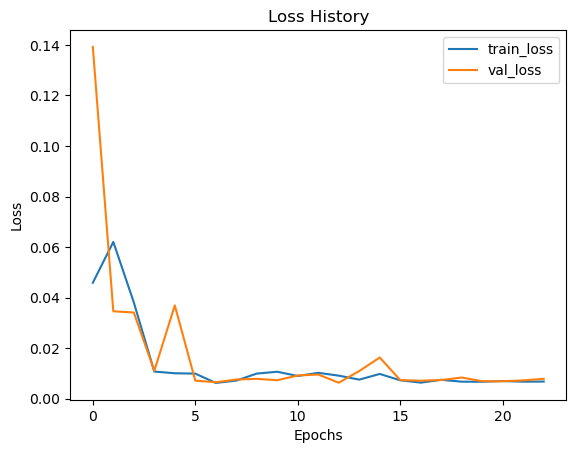

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

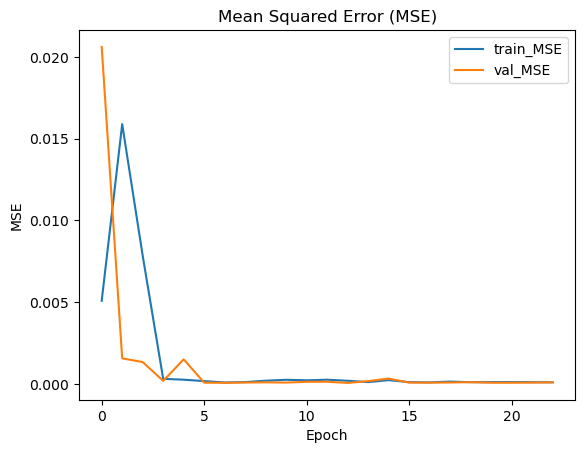

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

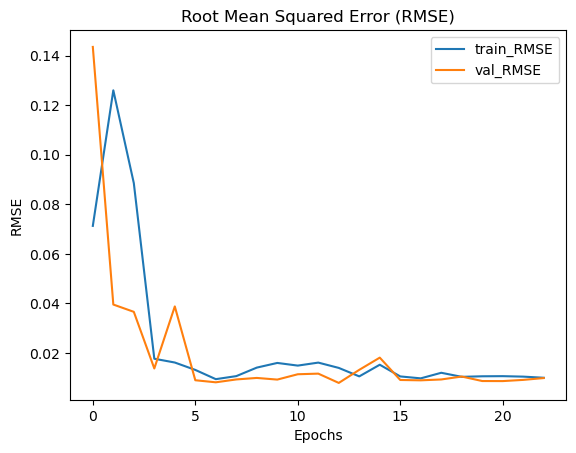

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

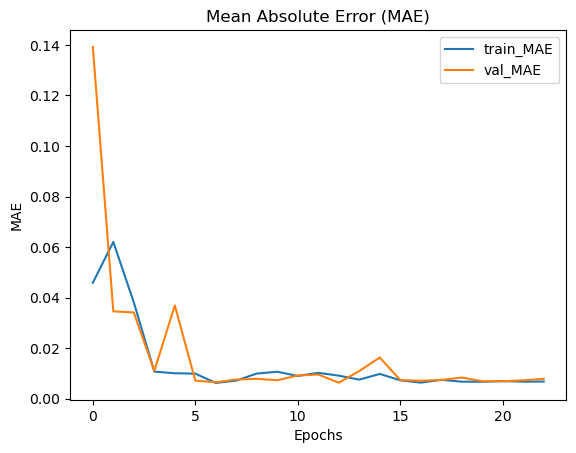

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

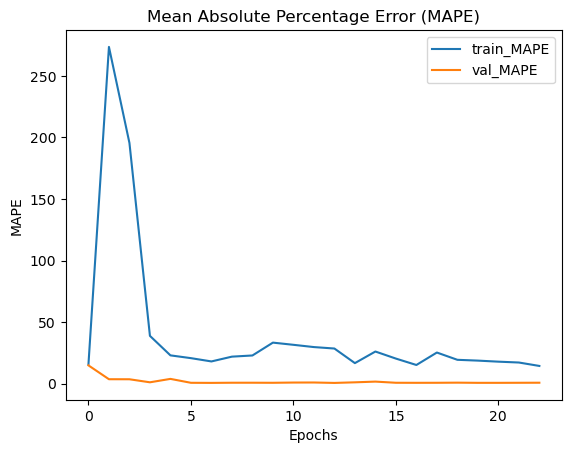

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:33:54.526751: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 2)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


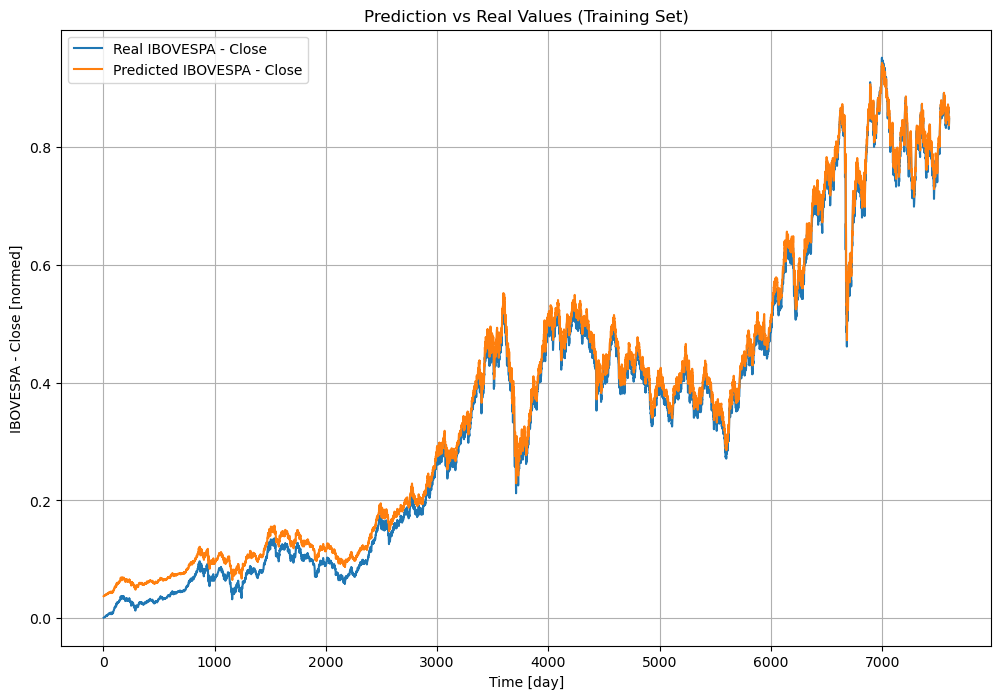

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


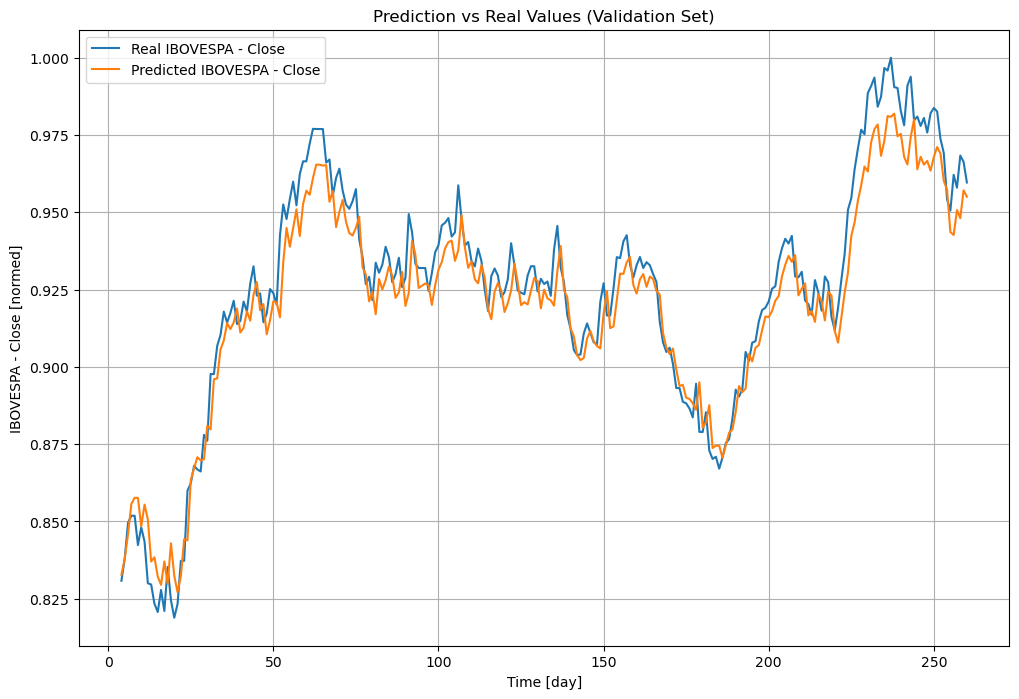

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


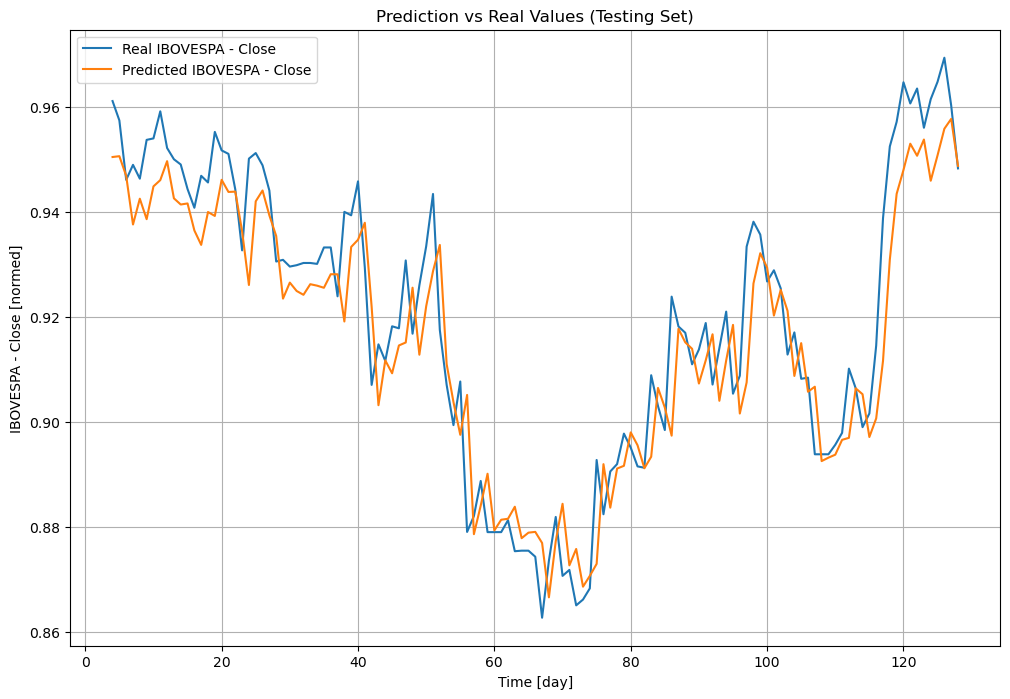

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

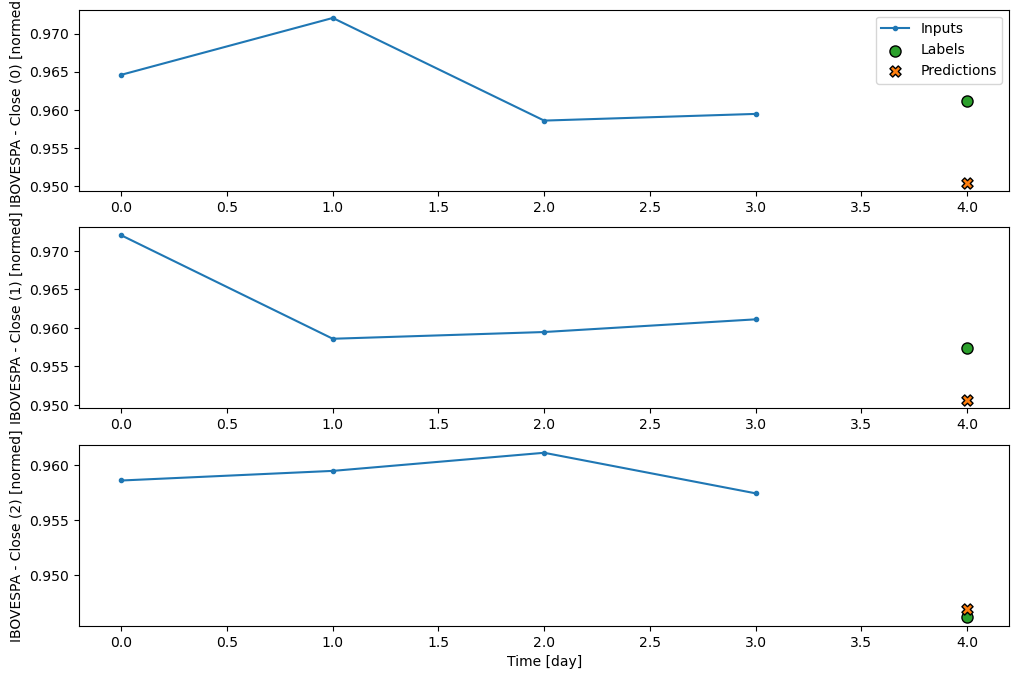

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:53s:770ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[[0.95045054, 0.95045054, 0.95045054, ..., 0.95045054,
         0.95045054, 0.95045054]],

       [[0.9506072 , 0.9506072 , 0.9506072 , ..., 0.9506072 ,
         0.9506072 , 0.9506072 ]],

       [[0.94685936, 0.94685936, 0.94685936, ..., 0.94685936,
         0.94685936, 0.94685936]],

       ...,

       [[0.9558377 , 0.9558377 , 0.9558377 , ..., 0.9558377 ,
         0.9558377 , 0.9558377 ]],

       [[0.9577166 , 0.9577166 , 0.9577166 , ..., 0.9577166 ,
         0.9577166 , 0.9577166 ]],

       [[0.94875646, 0.94875646, 0.94875646, ..., 0.94875646,
         0.94875646, 0.94875646]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')